In [7]:
#!pip install MSEplots-pkg

In [8]:
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir
from datetime import datetime
from MSEplots import plots as mpt

In [9]:
from metpy.calc.thermo import *
from metpy.units import units
import matplotlib.pyplot as plt

In [10]:
# reading data prociding vertical profiles of T, Td, pressure and height
date = datetime(2021, 5, 2, 12)
station = 'WBGB' ; title='2020-05-12, 12Z Bintulu '
df = WyomingUpperAir.request_data(date, station)
df

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1005.0,5.0,29.6,25.5,330,3,1.500000,-2.598076,WBGB,96441,2021-05-02 12:00:00,3.2,113.03,5.0,60.55
1,1000.0,69.0,28.8,25.1,330,4,2.000000,-3.464102,WBGB,96441,2021-05-02 12:00:00,3.2,113.03,5.0,60.55
2,993.0,132.0,28.2,24.7,331,5,2.424048,-4.373099,WBGB,96441,2021-05-02 12:00:00,3.2,113.03,5.0,60.55
3,990.0,159.0,28.2,24.5,332,6,2.816829,-5.297686,WBGB,96441,2021-05-02 12:00:00,3.2,113.03,5.0,60.55
4,975.0,294.0,27.1,23.9,335,9,3.803564,-8.156770,WBGB,96441,2021-05-02 12:00:00,3.2,113.03,5.0,60.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,20.0,26320.0,-53.7,-85.7,75,41,-39.602959,-10.611581,WBGB,96441,2021-05-02 12:00:00,3.2,113.03,5.0,60.55
82,19.2,26582.0,-54.1,-85.1,80,43,-42.346733,-7.466872,WBGB,96441,2021-05-02 12:00:00,3.2,113.03,5.0,60.55
83,16.6,27527.0,-48.5,-82.5,96,52,-51.715139,5.435480,WBGB,96441,2021-05-02 12:00:00,3.2,113.03,5.0,60.55
84,16.1,27728.0,-49.1,-82.1,99,54,-53.335170,8.447461,WBGB,96441,2021-05-02 12:00:00,3.2,113.03,5.0,60.55


In [11]:

non_dups = np.concatenate(([True], np.diff(df['pressure']) <= 16))
pressure = df['pressure'].values[non_dups]
Temp = df['temperature'].values 
Temp_dew = df['dewpoint'].values 
altitude = df['height'].values

from metpy.calc.thermo import *
from metpy.units import units
q = mixing_ratio(saturation_vapor_pressure(Temp_dew*units.degC),pressure*units.mbar)


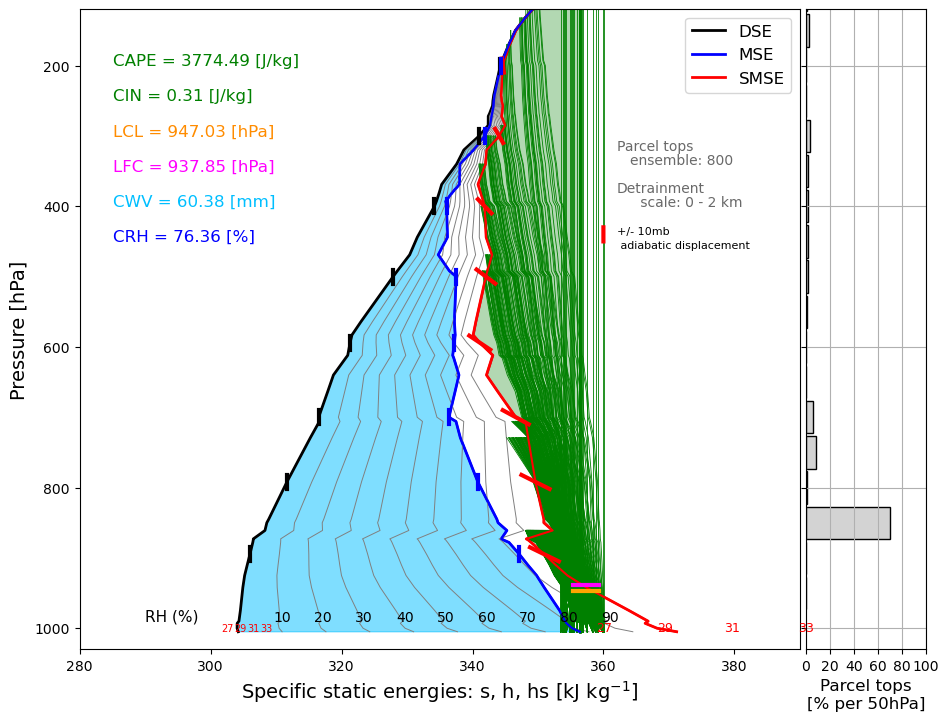

In [24]:
ax = mpt.msed_plots(pressure,Temp, q,altitude, h0_std=2000, ensemble_size=20, ent_rate=np.arange(0,2,0.05), entrain=True)

In [38]:
#ax = mpt.entropy_plots(np.array(pressure),np.array(Temp), np.array(q), np.array(altitude) , h0_std=2000, ensemble_size=20, ent_rate=np.arange(0,2,0.05), entrain=True)


In [22]:
from metpy.units import units
from metpy.calc import geopotential_height_from_pressure, geopotential_to_height

# Calculate geopotential height from pressure
geopot_height = geopotential_height_from_pressure(pressure * units.pascal)

# Convert geopotential height to geometric height
height = geopotential_to_height(geopot_height, Temp * units.Kelvin)

# Generate the plot using height instead of pressure
mpt.msed_plots(height, Temp, q, altitude, h0_std=2000, ensemble_size=20, ent_rate=np.arange(0,2,0.05), entrain=True)

# Add a title
plt.title("MSED Plots with Height")

# Show the plot
plt.show()


ImportError: cannot import name 'geopotential_height_from_pressure' from 'metpy.calc' (/opt/anaconda3/lib/python3.9/site-packages/metpy/calc/__init__.py)